In [1]:
import os
from  flutype_analysis import image2numeric, utils, analysis



import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

--------------------------------------------------------------------------------
Loading data corresponding to data_id: <2017-05-19_N11_Cal> in dir <../data/2017-05-19_N11_Cal>
--------------------------------------------------------------------------------
Virus .gal:../data/2017-05-19_N11_Cal/2017-05-19_N11_Cal_vir.gal
Peptide .gal :../data/2017-05-19_N11_Cal/2017-05-19_N11_Cal_pep.gal
Meta  :../data/2017-05-19_N11_Cal/2017-05-19_N11_Cal.meta
Image file  :../data/2017-05-19_N11_Cal/2017-05-19_N11_Cal_600_100_635.tif
Spot intensities for the data ID (2017-05-19_N11_Cal) are not averaged but primary values


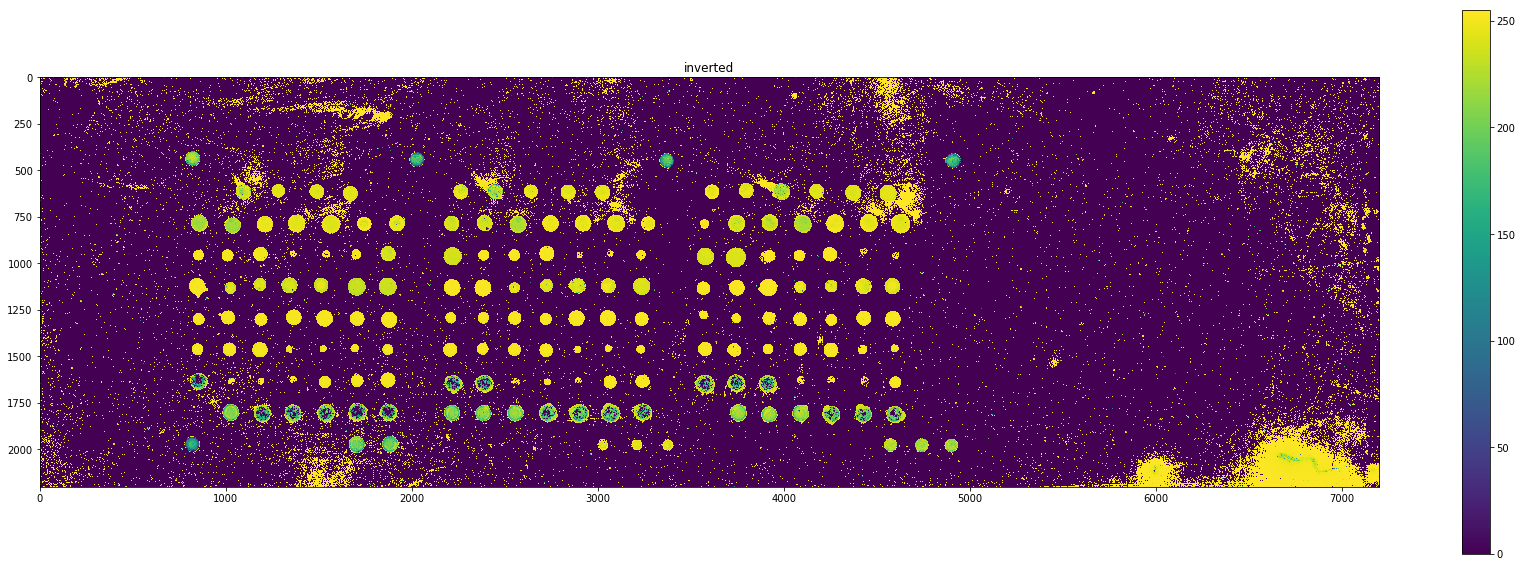

In [2]:
#data_id="2017-05-19_E5_X31" 
#data_id="2017-05-19_N5_X31"
#data_id="2017-05-19_N6_Pan"
#data_id="2017-05-19_N7_Cal"

# die guten Bilder

#data_id="2017-05-19_N9_X31" 
#data_id="2017-05-19_N10_Pan" 
data_id="2017-05-19_N11_Cal" 






directory = os.path.join("../data",data_id)
data = utils.load_data(data_id,directory,what="image2numeric")
ana=image2numeric.Image2numeric(data)
image2numeric.draw_imag(-ana.imag.T,"inverted")


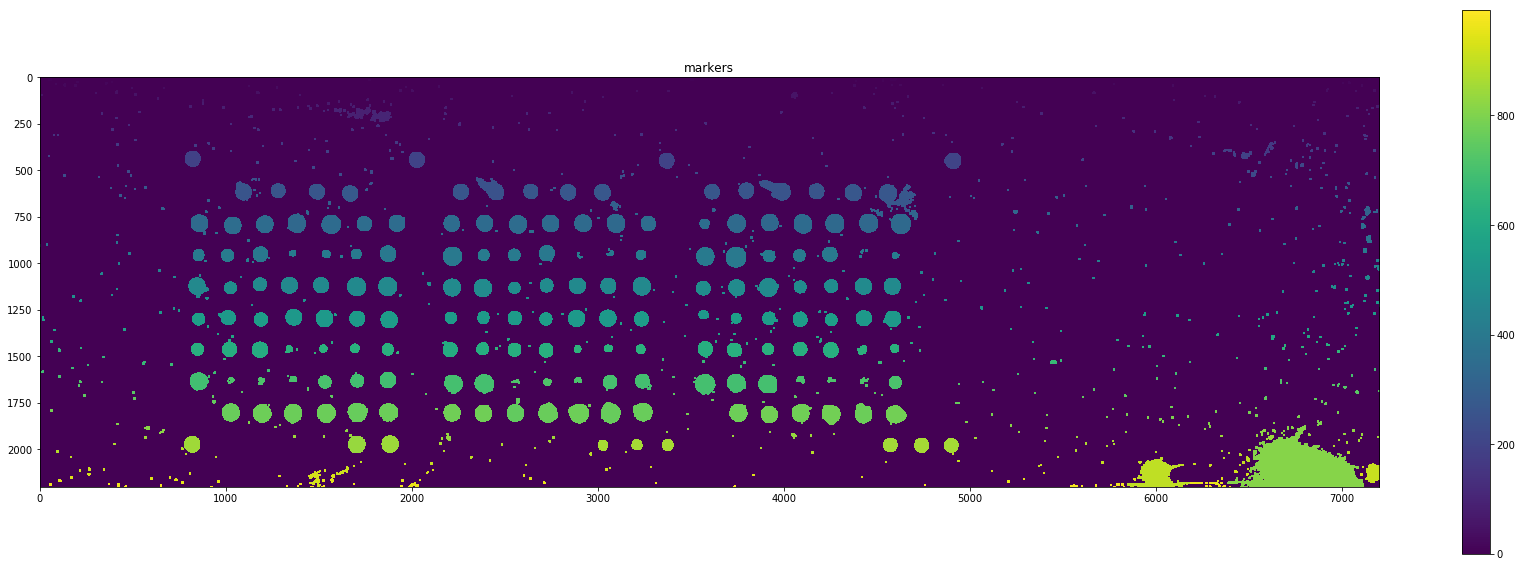

In [3]:
imag = ana.imag 
gray = imag.T

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(gray,cv2.MORPH_OPEN,kernel, iterations = 2)

#image2numeric.draw_imag(-gray,"inverted")
#image2numeric.draw_imag(opening,"noise removal",cmap="gray")
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
#image2numeric.draw_imag(sure_bg,"noise removal",cmap="gray")
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
#image2numeric.draw_imag(sure_fg,"noise removal",cmap="gray")
#unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_bg)

# Add one to all labels so that sure background is not 0, but 1
image2numeric.draw_imag(markers,"markers")

In [4]:
points_x = []
points_y = []
pointlist=[]
for marker in range(markers.max()):
    point= np.array(np.where(markers == marker))
    pointlist.append(len(point[0]))
    if 5*10**3 < len(point[0]) < 10**5:
        if 0.3 < image2numeric.spot_quality_shape(point[0],point[1]) < 3.0: 
            points_x.append(point[0].mean())
            points_y.append(point[1].mean())

gridshape = (ana.spot["Row"].max(), ana.spot["Column"].max())
    

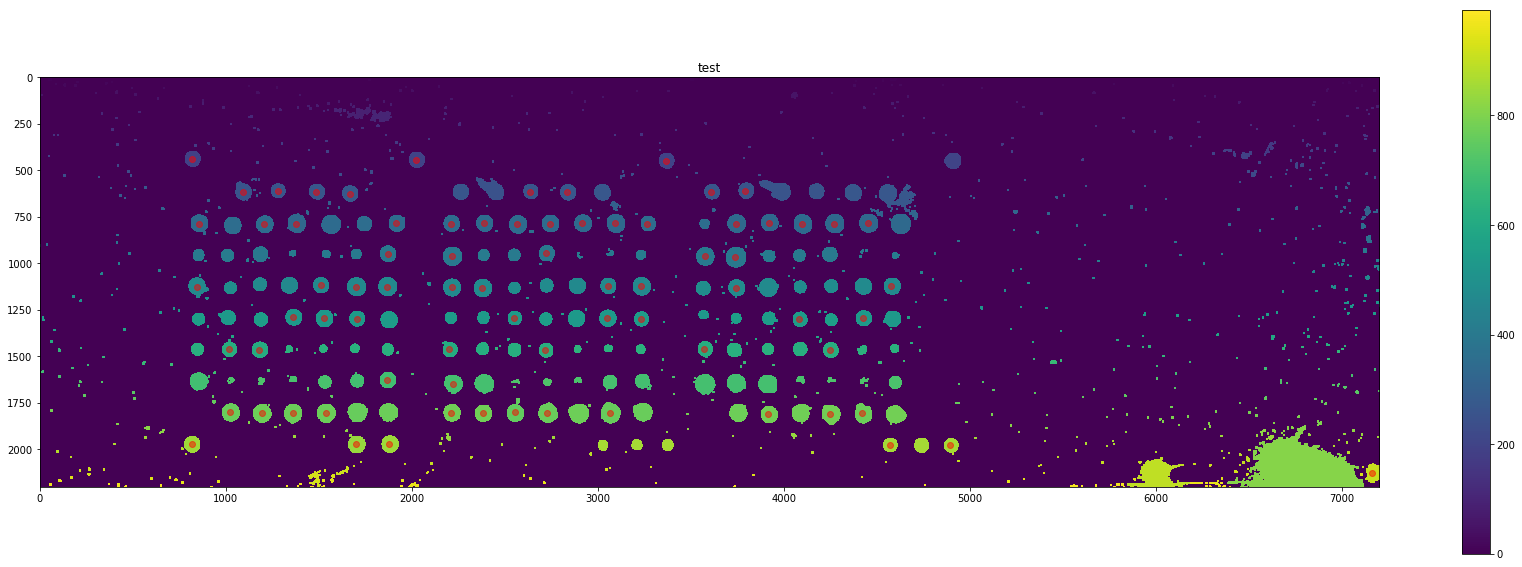

In [5]:
image2numeric.draw_grid(markers,points_y,points_x,"test")

In [6]:
points_y=np.array(points_y)
points_x = np.array(points_x)

pitch = (points_y.max()-points_y.min())/(ana.spot["Row"].max()-1)

shape = (ana.spot["Row"].max(), ana.spot["Column"].max())

center_x = points_x.min()+0.5*(points_x.max()-points_x.min())
center_y = points_y.min()+0.5*(points_y.max()-points_y.min())
rotation = 0

In [7]:
x ,y = image2numeric.spot_close_two_grid(points_x,points_y,pitch)
plt.scatter(x,y)

ValueError: Buffer has wrong number of dimensions (expected 2, got 1)

In [ ]:
#image2numeric.draw_imag(gray,"new")
plt.subplots(figsize=(30, 10))

#plt.imshow(markers)


X,Y = image2numeric.get_grid(shape, pitch, center_x, center_y, rotation)

plt.scatter(points_y,points_x)
plt.scatter(Y,X)
#estimate grid parameters 

#find closest
plt.show()
